In [1]:
import numpy as np
from dipole import calculate_interaction_matrix, participation_ratio

In [2]:
def cyclic_arrangement(n, mu0):
    """
    Returns a cyclic arrangement of n dipoles
    """
    dipoles = np.zeros((n, 3))
    phi = 2*np.pi/n
    
    cosm = np.cos(phi * np.arange(n))
    sinm = np.sin(phi * np.arange(n))
    
    # rotate the dipoles by symmetry
    dipoles[:, 0] = cosm * mu0[0] - sinm * mu0[1]
    dipoles[:, 1] = sinm * mu0[0] + cosm * mu0[1]
    dipoles[:, 2] = mu0[2]
    
    positionis = np.zeros((n, 3))
    positionis[:, 0] = cosm
    positionis[:, 1] = sinm
    positionis[:, 2] = 0
    
    return dipoles, positionis

In [24]:
# demo
n = 15
mu0 = np.array([1, 1, 1])
dipoles, positionis = cyclic_arrangement(n, mu0)

v = calculate_interaction_matrix(dipoles, positionis)

es, psis = np.linalg.eigh(v)
for i, e in enumerate(es):
    print(f"Eigenvalue {i}: {e:.4f}", end=' ')
    print(f"Participation ratio: {participation_ratio(psis[:, i])}")
    print(f"Eigenvector {i}: {psis[:, i]}", end='\n\n')
    

# TODO: compare with exact values
    

Eigenvalue 0: -1.6461 Participation ratio: 1687.5156320343222
Eigenvector 0: [ 0.36514836 -0.3571844   0.33360976 -0.29545478  0.24438701 -0.18263835
  0.11290751 -0.03824208 -0.03809471  0.11276659 -0.18251002  0.24427689
 -0.29536768  0.33354949 -0.35715359]

Eigenvalue 1: -1.6461 Participation ratio: 182169680.3493952
Eigenvector 1: [-7.40905160e-05 -7.58461423e-02  1.48451535e-01 -2.14568883e-01
  2.71308541e-01 -3.16190714e-01  3.47253836e-01 -3.63140299e-01
  3.63155788e-01 -3.47299626e-01  3.16264805e-01 -2.71407694e-01
  2.14688764e-01 -1.48586905e-01  7.59910853e-02]

Eigenvalue 2: -1.5398 Participation ratio: 767.9762664502288
Eigenvector 2: [-0.27037643  0.36299212 -0.31695715  0.14985533  0.07448614 -0.27037643
  0.36299212 -0.31695715  0.14985533  0.07448614 -0.27037643  0.36299212
 -0.31695715  0.14985533  0.07448614]

Eigenvalue 3: -1.5398 Participation ratio: 2102.3676229920206
Eigenvector 3: [-0.24541785  0.03962393  0.18130498 -0.33298155  0.35747049 -0.24541785
  0.0

Text(0, 0.5, 'Eigenvalue')

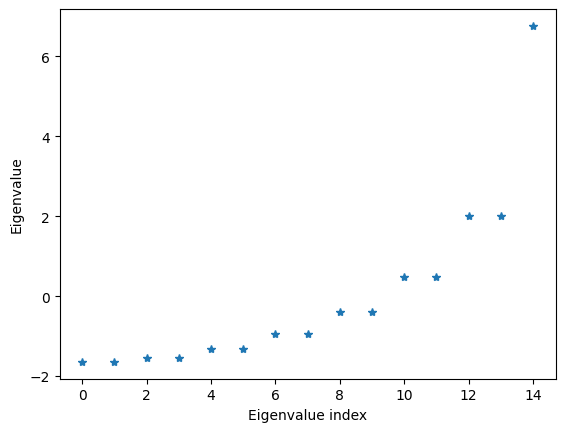

In [25]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax1.plot(es, '*')
ax1.set_xlabel('Eigenvalue index')
ax1.set_ylabel('Eigenvalue')

Text(0, 0.5, 'Participation ratio')

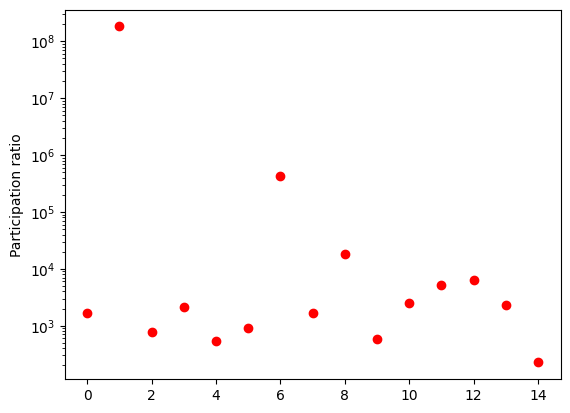

In [26]:
partition = np.array([participation_ratio(psis[:, i]) for i in range(n)])
plt.plot(partition, 'o', color='red')
plt.yscale('log')
plt.ylabel('Participation ratio')